### **1. Sales Forecasting for a Retail Store**

Mean Squared Error: 4136870.383718327
R-squared: 0.38352217741076633


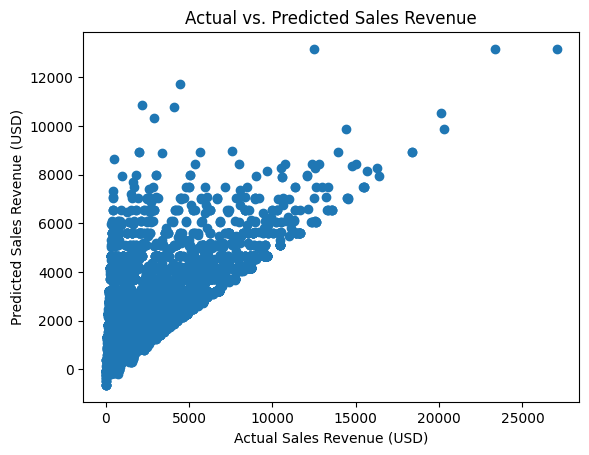

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Retail_sales.csv')
#preprocessing
df.dropna(inplace = True)

X= df[['Units Sold', 'Discount Percentage', 'Marketing Spend (USD)']]
Y = df['Sales Revenue (USD)']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Sales Revenue (USD)")
plt.ylabel("Predicted Sales Revenue (USD)")
plt.title("Actual vs. Predicted Sales Revenue")
plt.show()

### **2. Email Spam Detection using SVM**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk

df = pd.read_csv('spam.csv', encoding='latin-1')
print(df.columns)

df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Map labels to binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

#Text Preprocessing
nltk.download('stopwords')
from nltk .corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
corpus = []

for msg in df['message']:
  msg = re.sub('[^a-zA-Z]', ' ', msg).lower().split()
  msg = [ps.stem(word) for word in msg if word not in stopwords.words('english')]
  corpus.append(" ".join(msg))


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus).toarray()
Y = df['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### **3. Customer Churn Prediction using SVM**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df = df.drop(['customerID'], axis=1)

label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

#dependent & independent var
X = df.drop(columns = ['Churn'])
Y = df['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma = 'scale')
svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Accuracy: 0.8069552874378992
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1036
           1       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



### **4. Fraud Detection in Credit Card Transactions**

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('creditcard.csv')
df.dropna(inplace=True)

df_sample = df.sample(frac=0.1, random_state=42)
X= df.drop(columns='Class')
Y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', C=1, gamma = 'scale')
svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))

print(classification_report(Y_test, Y_pred))

Accuracy: 0.9993395914901646
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42324
         1.0       0.98      0.64      0.77        74

    accuracy                           1.00     42398
   macro avg       0.99      0.82      0.89     42398
weighted avg       1.00      1.00      1.00     42398

